# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [164]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Check the column names of both dataframes
print(mouse_metadata.columns)
print(study_results.columns)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID"])

# Display the data table for preview
combined_data.head()

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], dtype='object')
Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'], dtype='object')


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [165]:
# Checking the number of mice.
mouse_count = combined_data["Mouse ID"].nunique()
mouse_count

249

In [166]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ID = combined_data.loc[combined_data.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicate_mouse_ID

array(['g989'], dtype=object)

In [167]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_ID = combined_data.loc[combined_data["Mouse ID"] == "g989"]
duplicate_mouse_ID

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [168]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data.drop_duplicates().dropna()
clean_data.drop(clean_data.loc[clean_data["Mouse ID"] == "g989"].index, inplace=True)
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [169]:
# Checking the number of mice in the clean DataFrame.
mouse_count = clean_data["Mouse ID"].nunique()
mouse_count

248

## Summary Statistics

In [170]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen.
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

# Drop null values from clean_data before grouping
clean_data = clean_data.dropna()

# Group by drug regimen
drug_regimen = clean_data.groupby(["Drug Regimen"])

# Calculate mean, median, variance, standard deviation, and SEM of the tumor volume
mean = drug_regimen["Tumor Volume (mm3)"].mean()
median = drug_regimen["Tumor Volume (mm3)"].median()
variance = drug_regimen["Tumor Volume (mm3)"].var()
std_dev = drug_regimen["Tumor Volume (mm3)"].std()
sem = drug_regimen["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({"Mean Tumor Volume": mean, "Median Tumor Volume": median,
                           "Variance Tumor Volume": variance,
                           "Standard Deviation Tumor Volume": std_dev,
                           "Tumor Volume Std.Err.": sem})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,Tumor Volume Std.Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [171]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summary_df = clean_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})


# Using the aggregation method, produce the same summary statistics in a single line
summary_df



Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

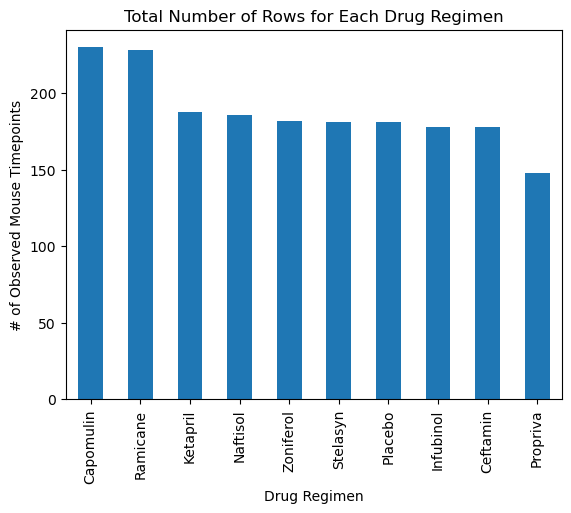

In [172]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Group by drug regimen
regimen_counts = clean_data["Drug Regimen"].value_counts()

# Create a DataFrame from the series for plotting
regimen_counts_df = pd.DataFrame({"Drug Regimen": regimen_counts.index, "Count": regimen_counts.values})

# Create a bar plot
regimen_counts_df.plot(kind="bar", x="Drug Regimen", y="Count", legend=False)

# Set labels and title
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Total Number of Rows for Each Drug Regimen")

# Show the plot
plt.show()



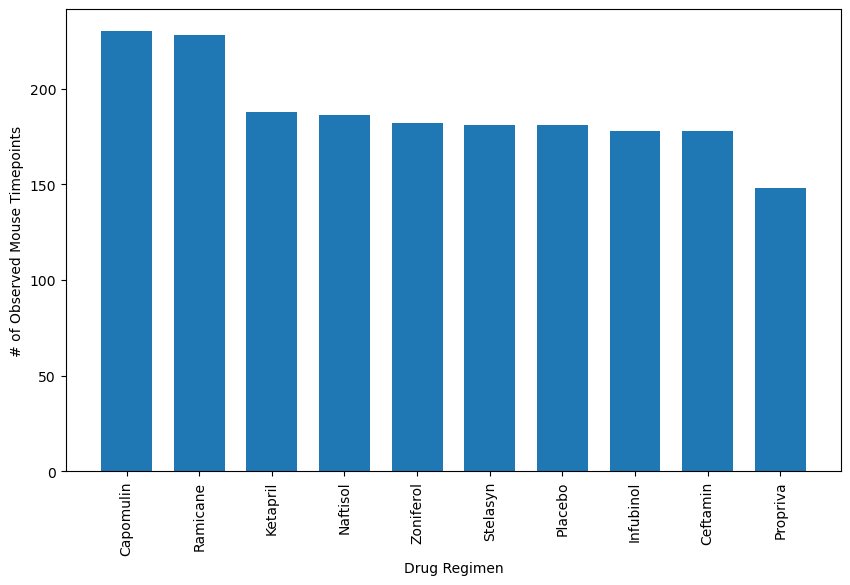

In [173]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

regimen_names = regimen_counts.index
regimen_count_values = regimen_counts.values

# Create a bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(regimen_names, regimen_count_values, width=0.7, align="center")

# Set labels and title
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")


# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()


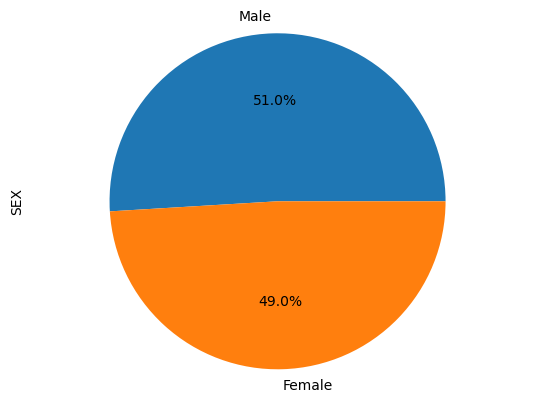

In [174]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Group data by "Sex" and count the number of mice in each group
sex_counts = clean_data["Sex"].value_counts()

# Create a DataFrame from the series for plotting
sex_counts_df = pd.DataFrame({"Sex": sex_counts.index, "SEX": sex_counts.values})

# Create a pie plot
sex_counts_df.plot.pie(y="SEX", labels=sex_counts_df["Sex"], autopct='%1.1f%%', startangle=0, legend=False)



# Show the plot
plt.axis("equal") 

plt.show()


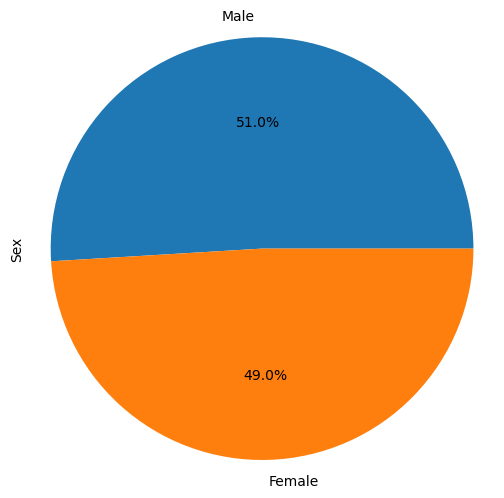

In [175]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Group data by "Sex" and count the number of mice in each group
sex_counts = clean_data["Sex"].value_counts()

sex_labels = sex_counts.index
sex_count_values = sex_counts.values

# Create a pie plot
plt.figure(figsize=(6, 6))
explode = (0, 0) 
plt.pie(sex_count_values, labels=sex_labels, autopct='%1.1f%%', startangle=0, explode=explode)

plt.ylabel("Sex")

# Show the plot
plt.axis("equal")  # Equal aspect ratio ensures that the pie chart is circular
plt.show()








## Quartiles, Outliers and Boxplots

In [176]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

last_timepoints = clean_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

final_tumor_volume = pd.merge(last_timepoints, clean_data, on=['Mouse ID', 'Timepoint'], how='left')

# Filter the DataFrame to include only the specified treatment regimens (Capomulin, Ramicane, Infubinol, and Ceftamin)
target_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volume = final_tumor_volume[final_tumor_volume['Drug Regimen'].isin(target_regimens)]


In [177]:
# Put treatments into a list for for loop (and later for plot labels)
target_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for regimen in target_regimens:
    
    
    # Filter the DataFrame to include only the current treatment regimen
    regimen_data = final_tumor_volume[final_tumor_volume['Drug Regimen'] == regimen]['Tumor Volume (mm3)']

    # Calculate the quartiles, IQR, and bounds
    quartiles = regimen_data.quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr

    # Find potential outliers
    outliers = regimen_data[(regimen_data < lower_bound) | (regimen_data > upper_bound)]
    
    # Append the results to the tumor_vol_data list
    tumor_vol_data.append(f"{regimen}'s potential outliers: {outliers}")

for result in tumor_vol_data:
    print(result)


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


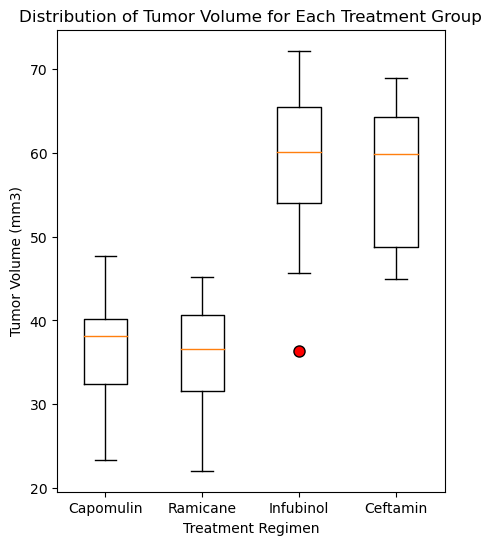

In [178]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Create a list of treatment regimens
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list to store tumor volume data for each treatment
tumor_volume_data = []

# Iterate through each treatment regimen and collect the tumor volume data
for regimen in treatment_regimens:
    regimen_data = final_tumor_volume[final_tumor_volume['Drug Regimen'] == regimen]['Tumor Volume (mm3)']
    tumor_volume_data.append(regimen_data)

# Create a vertical box plot without color filling
plt.figure(figsize=(5, 6))  # Adjust the figure size as needed
plt.boxplot(tumor_volume_data, labels=treatment_regimens, vert=True, patch_artist=False, flierprops={'markerfacecolor': 'red', 'markersize': 8})

# Set labels and title
plt.xlabel("Treatment Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Distribution of Tumor Volume for Each Treatment Group")

# Show the plot
plt.show()


## Line and Scatter Plots

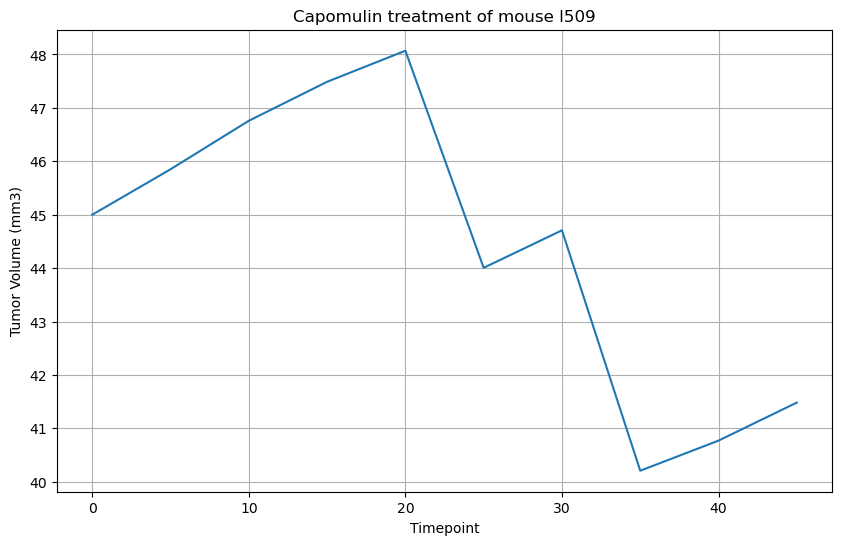

In [179]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Select a mouse that was treated with Capomulin
mouse_id = 'l509'
capomulin_data = clean_data[(clean_data['Drug Regimen'] == 'Capomulin') & (clean_data['Mouse ID'] == mouse_id)]

# Create a line plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'], linestyle='-', markersize=8)

# Set labels and title
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")

# Show the plot
plt.grid()
plt.show()


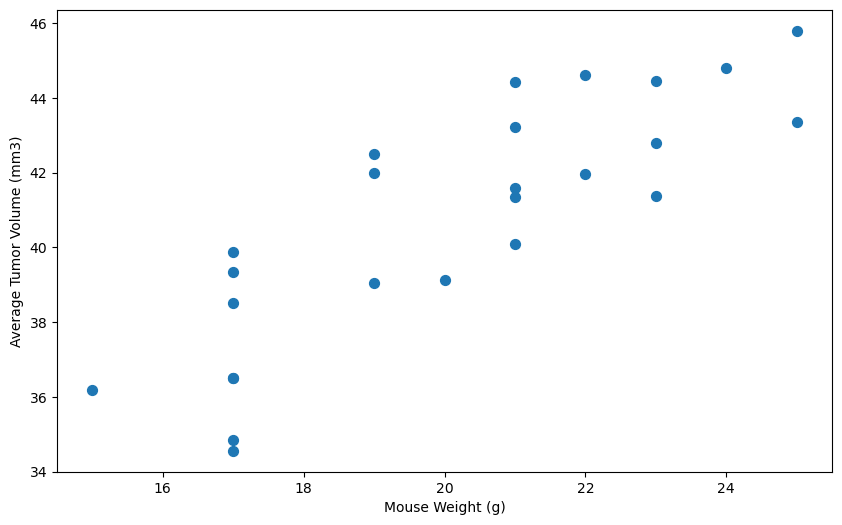

In [180]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Group data by mouse ID and calculate the average tumor volume
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']
capomulin_avg_tumor_vol = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Get the mouse weights for the Capomulin regimen
capomulin_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Create a scatter plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.scatter(capomulin_weights, capomulin_avg_tumor_vol, s=50)

# Set labels and title
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Show the plot
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


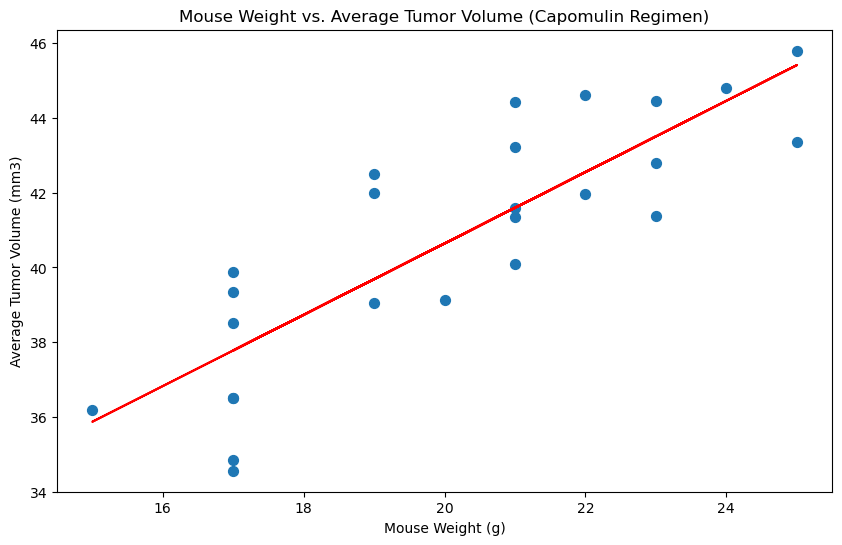

In [181]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Calculate the correlation coefficient
correlation_coefficient = capomulin_weights.corr(capomulin_avg_tumor_vol)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(capomulin_weights, capomulin_avg_tumor_vol)

# Create a scatter plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.scatter(capomulin_weights, capomulin_avg_tumor_vol, s=50)

# Add the regression line to the plot
regress_values = capomulin_weights * slope + intercept
plt.plot(capomulin_weights, regress_values, "r-")

# Set labels and title
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")

# Display the correlation coefficient
print(f"The correlation between mouse weight and the average tumor volume is {correlation_coefficient:.2f}")

# Show the plot
plt.show()

